# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(1952, 1, 3)
end = datetime.datetime.now()

Define the periods

In [4]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    _, strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [6]:
metrics = ('start',
           'ending_balance',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
start,1950-03-15,1950-04-20,1950-05-25,1950-06-30,1950-08-07,1950-09-12,1950-10-18,1950-11-24,1951-01-02,1951-02-06,1951-03-15,1951-04-20,1951-05-25,1951-07-02,1951-08-07,1951-09-12,1951-10-18,1951-11-27,1952-01-03
ending_balance,695297.64,752467.00,632316.35,865249.40,1001089.59,1321711.68,1209379.14,1495030.89,1316655.98,1061005.96,890085.25,989715.70,906624.05,1020706.80,844559.19,584869.94,474379.22,500500.46,414288.68
annual_return_rate,6.31,6.44,6.18,6.67,6.91,7.35,7.22,7.56,7.38,7.05,6.79,6.96,6.84,7.03,6.75,6.18,5.86,5.95,5.67
max_closed_out_drawdown,-39.52,-37.82,-50.60,-45.23,-38.18,-32.79,-28.26,-25.25,-21.64,-23.85,-35.43,-35.66,-36.46,-35.37,-36.47,-39.90,-43.89,-43.38,-42.93
drawdown_annualized_return,-6.27,-5.87,-8.19,-6.78,-5.53,-4.46,-3.91,-3.34,-2.93,-3.38,-5.22,-5.12,-5.33,-5.03,-5.41,-6.46,-7.49,-7.29,-7.57
drawdown_recovery,-9.88,-3.91,-3.93,-3.75,-3.75,-3.75,-3.76,-1.02,-0.30,-0.21,-1.24,-1.22,-1.27,-1.31,-1.36,-1.36,-1.36,-1.36,-1.36
best_month,15.18,15.17,15.18,14.93,14.92,14.92,13.42,13.41,13.40,13.40,13.40,14.53,14.54,14.55,15.87,15.87,18.16,18.15,18.16
worst_month,-15.40,-12.67,-12.69,-12.68,-12.11,-11.35,-11.96,-15.03,-14.22,-14.55,-31.46,-31.46,-31.45,-31.45,-31.45,-31.47,-31.44,-31.46,-31.42
sharpe_ratio,0.69,0.69,0.66,0.70,0.72,0.76,0.74,0.77,0.74,0.71,0.66,0.68,0.66,0.67,0.65,0.59,0.57,0.57,0.55
sortino_ratio,0.73,0.76,0.72,0.78,0.81,0.85,0.84,0.88,0.86,0.81,0.71,0.73,0.72,0.74,0.71,0.66,0.62,0.63,0.60


Bar graphs

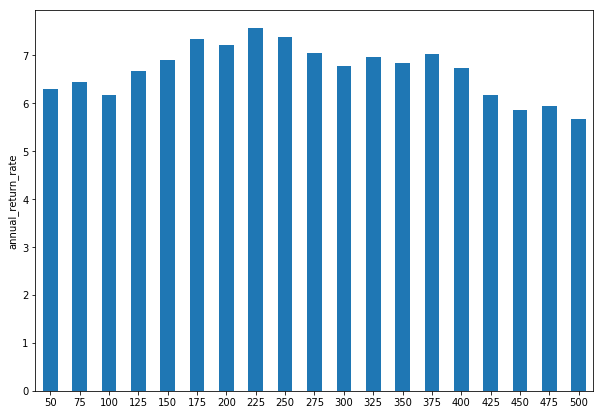

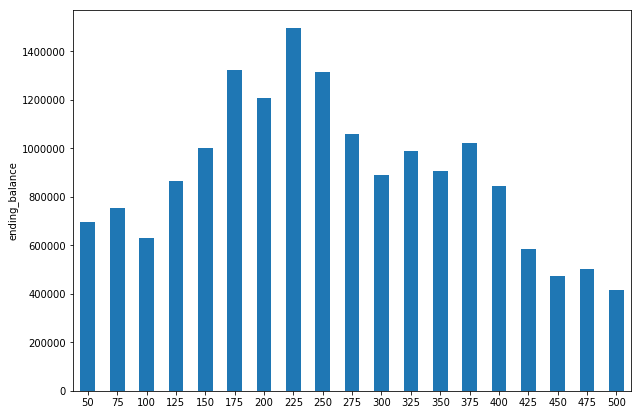

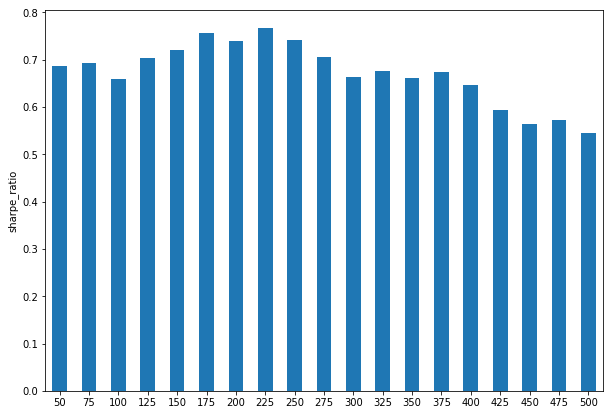

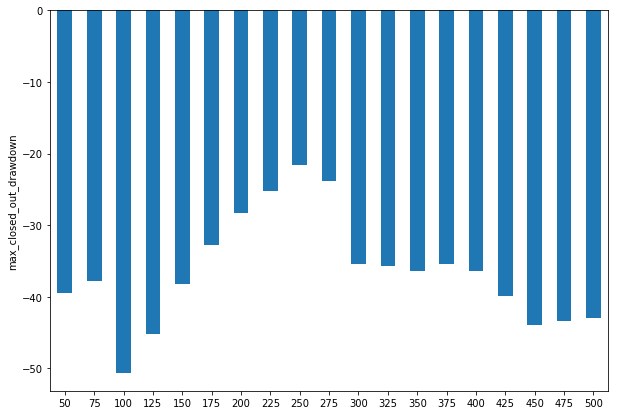

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-03-15 00:00:00 BUY  573 ^GSPC @ 17.45
2019-07-24 00:00:00 SELL 573 ^GSPC @ 3019.56


Equity curve

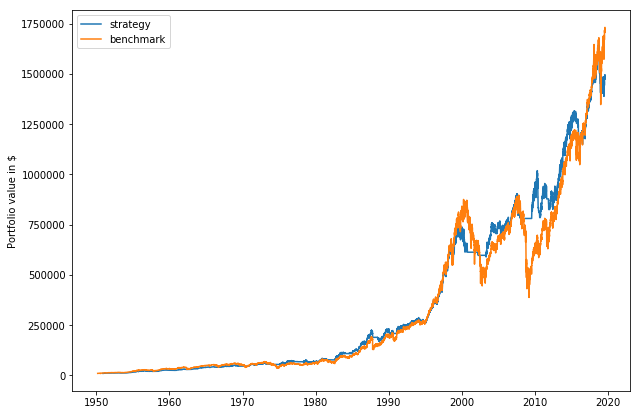

In [9]:
pf.plot_equity_curve(strategies['225'].dbal, benchmark=benchmark.dbal)